In [1]:
from zern.zern_core import Zernike
import numpy as np

In [2]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../FastZernike/"))

from zernipax.basis import ZernikePolynomial
from zernipax.zernike import *
from zernipax.plotting import plot_comparison

import mpmath
import matplotlib

using JAX backend, jax version=0.4.28, jaxlib version=0.4.28, dtype=float64
Using device: CPU, with 5.92 GB available memory


In [8]:
res = 100
basis = ZernikePolynomial(L=res, M=res, spectral_indexing="ansi", sym="cos")
ms = basis.modes[:,1]
ns = basis.modes[:,0]
r = np.linspace(0, 1, 100)
all_zernipax = zernike_radial(r, basis.modes[:,0], basis.modes[:,1], 0)

In [9]:
def fun():
    zern = Zernike(0)
    all = []
    for i in range(len(ms)): 
        all.append(zern.R_nm_Jacobi(int(ns[i]), int(ms[i]), r))

    return np.array(all)

all_zern = fun().T

In [10]:
# Exact computation
mpmath.mp.dps = 100
def fun2():
    c = zernike_radial_coeffs(basis.modes[:, 0], basis.modes[:, 1], exact=True)
    zt0 = np.array([np.asarray(mpmath.polyval(list(ci), r), dtype=float) for ci in c]).T
    return zt0

zt0 = fun2()

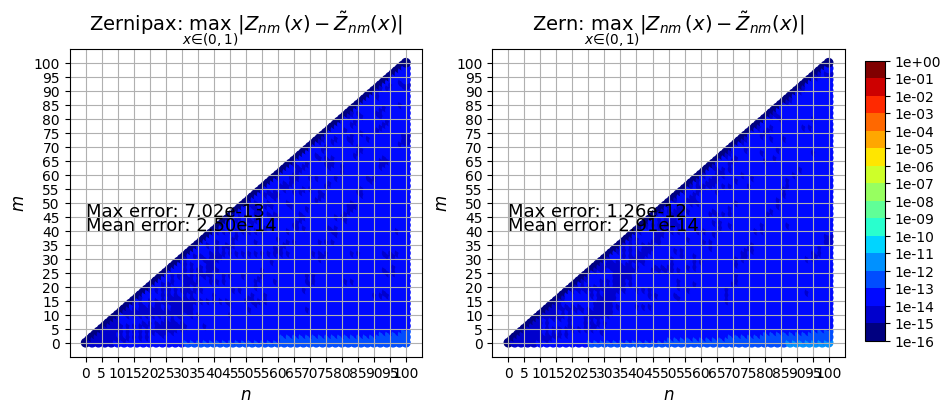

In [11]:
from zernipax.plotting import plot_comparison
plot_comparison(zt0, (all_zernipax, all_zern), basis, 0, "absolute", names=("Zernipax:", "Zern:"), print_error=True)

In [7]:
%timeit zernike_radial(r, basis.modes[:,0], basis.modes[:,1], 0).block_until_ready()
%timeit fun()

1.29 ms ± 89.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
49.4 ms ± 4.61 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
